# Gaussian Process Tutorial - Part 3: Application

# Application

## AirPassenger

As a first real world example we will fit a GP to the airline passenger dataset. (Box, G. E. P., Jenkins, G. M. and Reinsel, G. C. (1976) Time Series Analysis, Forecasting and Control. Third Edition. Holden-Day. Series G.).

In [21]:
# Air Passenger Data
y=np.array([112, 118, 132, 129, 121,135, 148, 148, 136, 119, 104, 118,
 115, 126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140,
 145, 150, 178, 163, 172, 178, 199, 199, 184, 162, 146, 166,
 171, 180, 193, 181, 183, 218, 230, 242, 209, 191, 172, 194,
 196, 196, 236, 235, 229, 243, 264, 272, 237, 211, 180, 201,
 204, 188, 235, 227, 234, 264, 302, 293, 259, 229, 203, 229,
 242, 233, 267, 269, 270, 315, 364, 347, 312, 274, 237, 278,
 284, 277, 317, 313, 318, 374, 413, 405, 355, 306, 271, 306,
 315, 301, 356, 348, 355, 422, 465, 467, 404, 347, 305, 336,
 340, 318, 362, 348, 363, 435, 491, 505, 404, 359, 310, 337,
 360, 342, 406, 396, 420, 472, 548, 559, 463, 407, 362, 405,
 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390, 432]).reshape((-1,1))
X=np.arange(y.shape[0]).reshape((-1,1))

date=pd.date_range('1949-01-01','1960-12-01', 
              freq='MS')

<IPython.core.display.Javascript object>


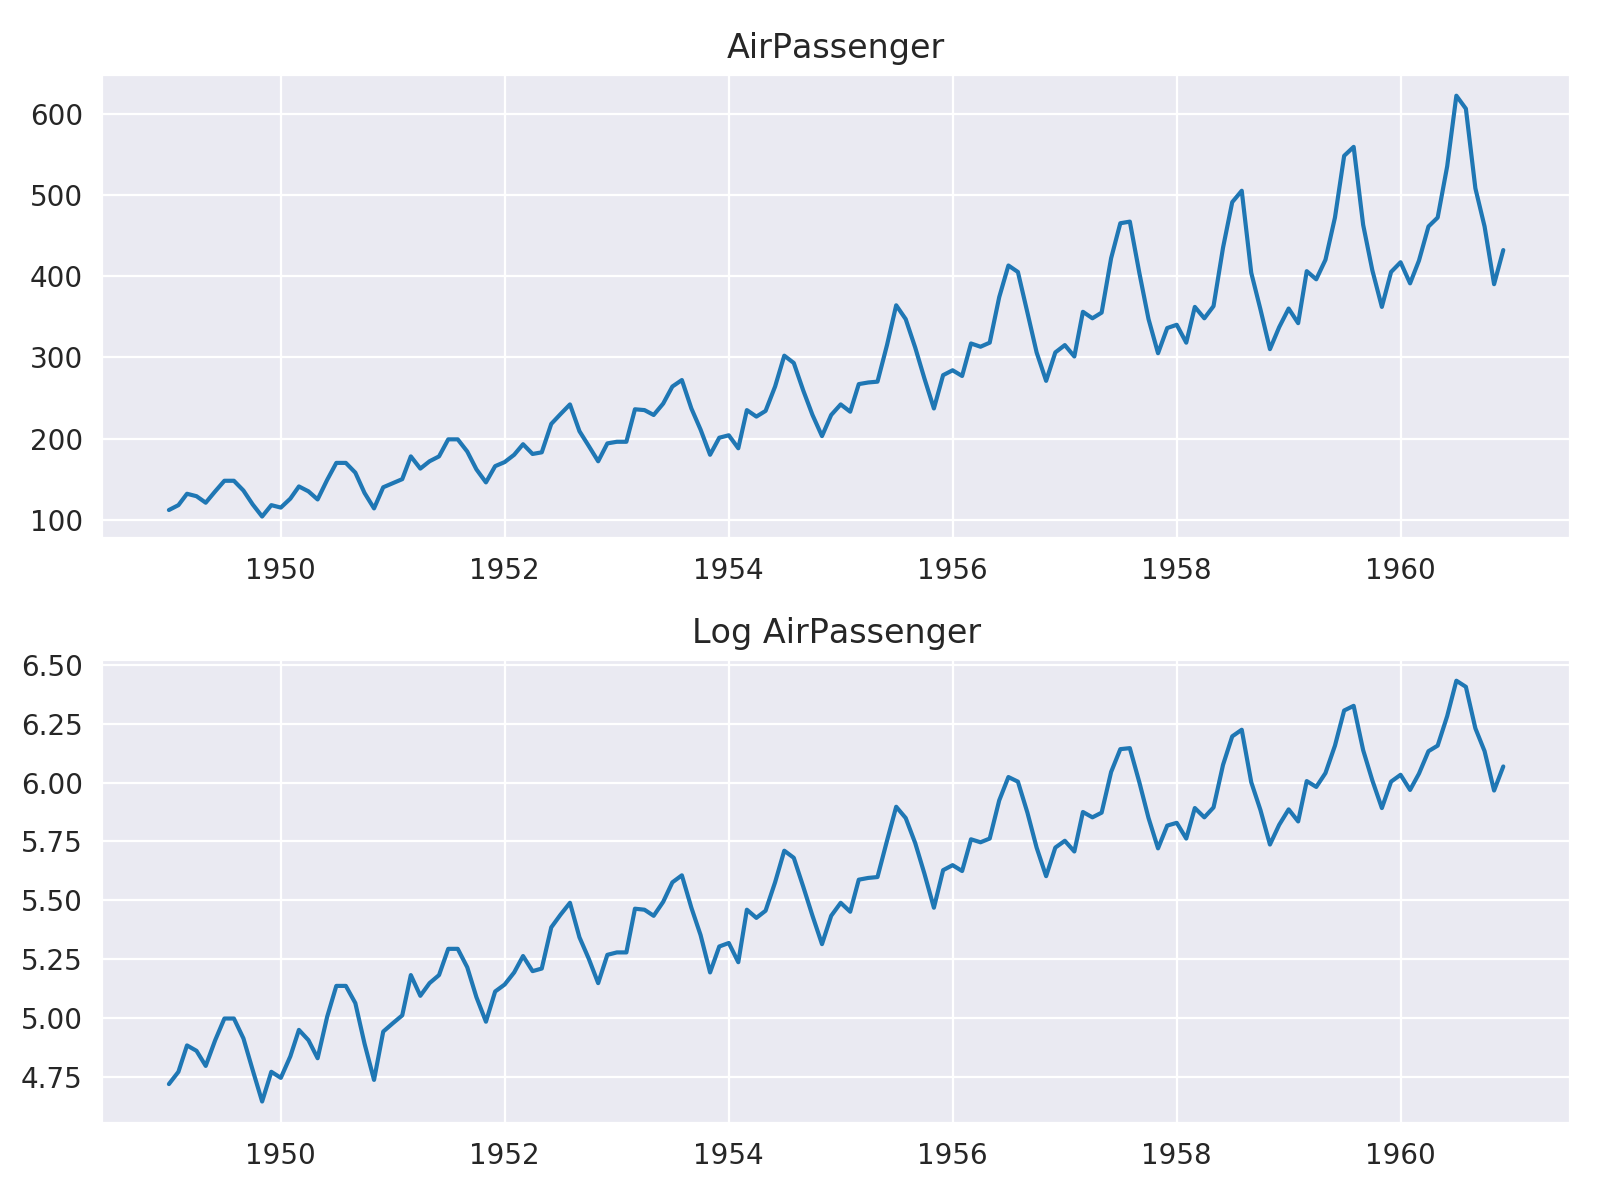

/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


In [22]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

ax1.plot(date, y)
ax1.set_title('AirPassenger')

ax2.plot(date, np.log(y))
ax2.set_title('Log AirPassenger')

plt.tight_layout()
plt.show()

Due to the increasing variance we fit a GP to the log-transformed data.

In [23]:
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel, RBF, ExpSineSquared, RationalQuadratic

In [24]:
X_train = X
y_train= np.log(y)
X_test=np.arange(-12, y.shape[0]+12).reshape((-1,1))

In [25]:
k1 = ConstantKernel() 

In [26]:
k2 = RBF(length_scale=60)*ExpSineSquared(length_scale=1, periodicity=12)

In [27]:
k3 = RBF(length_scale=90)*ExpSineSquared(length_scale=1, periodicity=12)

In [28]:
k4 =  WhiteKernel(noise_level=1)

In [29]:
kernel_gp = k1+k2+k3+k4

4.85**2 + RBF(length_scale=197) * ExpSineSquared(length_scale=71.3, periodicity=25.7) + RBF(length_scale=1.05e+03) * ExpSineSquared(length_scale=1.12, periodicity=12) + WhiteKernel(noise_level=0.00138)


<IPython.core.display.Javascript object>


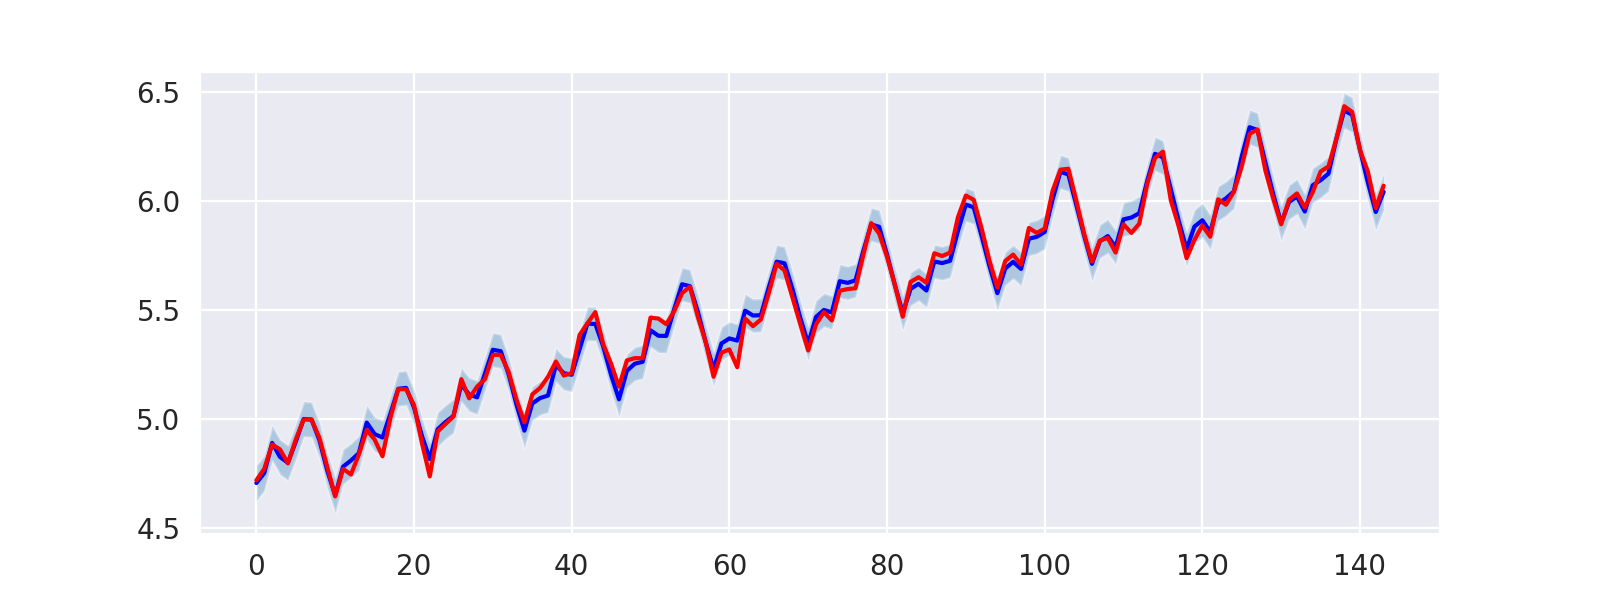

In [30]:
GPR = gaussian_process.GaussianProcessRegressor(kernel=kernel_gp)
GPR.fit(X_train, y_train)
print(GPR.kernel_)
#X_test = np.arange(y.shape[0], y.shape[0]+24).reshape(-1,1)
y_pred, sigma = GPR.predict(X_train, return_std=True)
error = (1.96 * sigma).reshape(-1,1)

# plot
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(X_train.ravel(), y_pred.ravel(), 'b' )
ax.fill_between(X_train.ravel(), y_pred.ravel() - error.ravel(), y_pred.ravel() + error.ravel(), alpha=0.3)
ax.plot(X_train, y_train, 'r-', ms=2)
plt.show()
#

# Application

## AirPassenger

As a first real world example we will fit a GP to the airline passenger dataset. (Box, G. E. P., Jenkins, G. M. and Reinsel, G. C. (1976) Time Series Analysis, Forecasting and Control. Third Edition. Holden-Day. Series G.).

In [21]:
# Air Passenger Data
y=np.array([112, 118, 132, 129, 121,135, 148, 148, 136, 119, 104, 118,
 115, 126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140,
 145, 150, 178, 163, 172, 178, 199, 199, 184, 162, 146, 166,
 171, 180, 193, 181, 183, 218, 230, 242, 209, 191, 172, 194,
 196, 196, 236, 235, 229, 243, 264, 272, 237, 211, 180, 201,
 204, 188, 235, 227, 234, 264, 302, 293, 259, 229, 203, 229,
 242, 233, 267, 269, 270, 315, 364, 347, 312, 274, 237, 278,
 284, 277, 317, 313, 318, 374, 413, 405, 355, 306, 271, 306,
 315, 301, 356, 348, 355, 422, 465, 467, 404, 347, 305, 336,
 340, 318, 362, 348, 363, 435, 491, 505, 404, 359, 310, 337,
 360, 342, 406, 396, 420, 472, 548, 559, 463, 407, 362, 405,
 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390, 432]).reshape((-1,1))
X=np.arange(y.shape[0]).reshape((-1,1))

date=pd.date_range('1949-01-01','1960-12-01', 
              freq='MS')

<IPython.core.display.Javascript object>


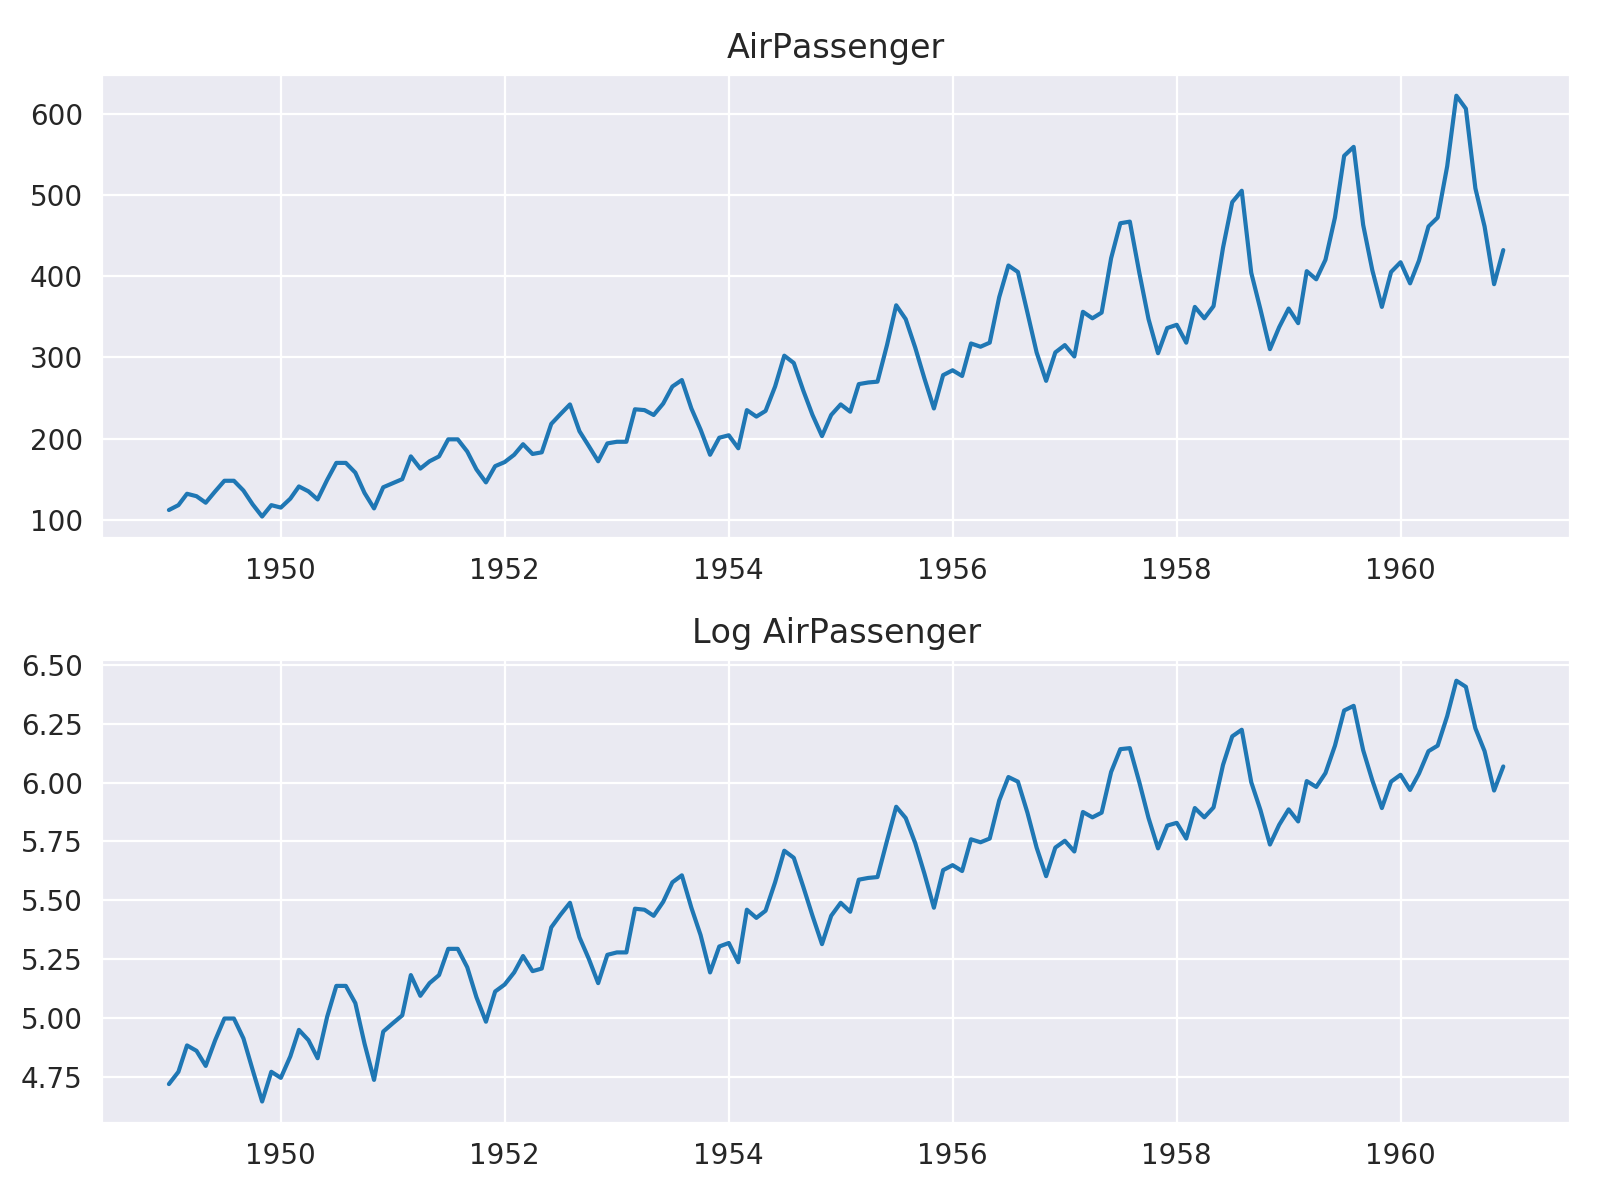

/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


In [22]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

ax1.plot(date, y)
ax1.set_title('AirPassenger')

ax2.plot(date, np.log(y))
ax2.set_title('Log AirPassenger')

plt.tight_layout()
plt.show()

Due to the increasing variance we fit a GP to the log-transformed data.

In [23]:
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel, RBF, ExpSineSquared, RationalQuadratic

In [24]:
X_train = X
y_train= np.log(y)
X_test=np.arange(-12, y.shape[0]+12).reshape((-1,1))

In [25]:
k1 = ConstantKernel() 

In [26]:
k2 = RBF(length_scale=60)*ExpSineSquared(length_scale=1, periodicity=12)

In [27]:
k3 = RBF(length_scale=90)*ExpSineSquared(length_scale=1, periodicity=12)

In [28]:
k4 =  WhiteKernel(noise_level=1)

In [29]:
kernel_gp = k1+k2+k3+k4

4.85**2 + RBF(length_scale=197) * ExpSineSquared(length_scale=71.3, periodicity=25.7) + RBF(length_scale=1.05e+03) * ExpSineSquared(length_scale=1.12, periodicity=12) + WhiteKernel(noise_level=0.00138)


<IPython.core.display.Javascript object>


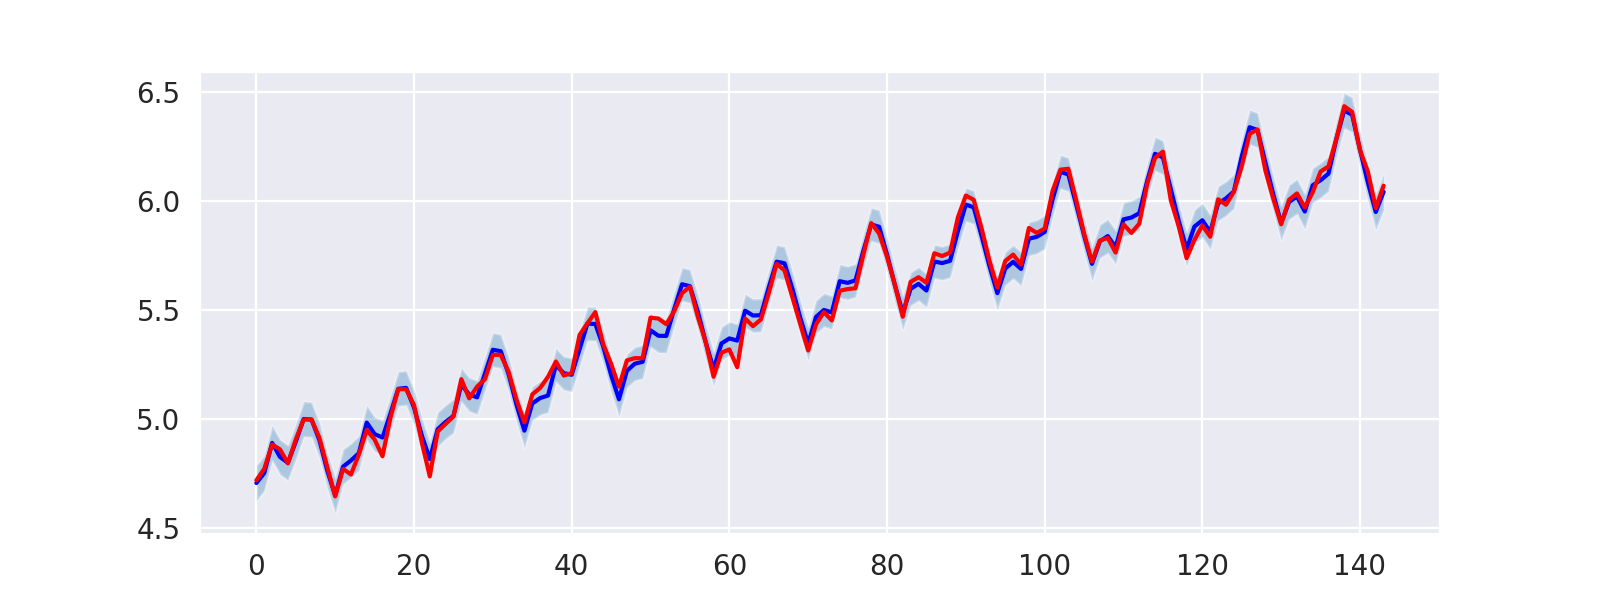

In [30]:
GPR = gaussian_process.GaussianProcessRegressor(kernel=kernel_gp)
GPR.fit(X_train, y_train)
print(GPR.kernel_)
#X_test = np.arange(y.shape[0], y.shape[0]+24).reshape(-1,1)
y_pred, sigma = GPR.predict(X_train, return_std=True)
error = (1.96 * sigma).reshape(-1,1)

# plot
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(X_train.ravel(), y_pred.ravel(), 'b' )
ax.fill_between(X_train.ravel(), y_pred.ravel() - error.ravel(), y_pred.ravel() + error.ravel(), alpha=0.3)
ax.plot(X_train, y_train, 'r-', ms=2)
plt.show()
#

# Application

## AirPassenger

As a first real world example we will fit a GP to the airline passenger dataset. (Box, G. E. P., Jenkins, G. M. and Reinsel, G. C. (1976) Time Series Analysis, Forecasting and Control. Third Edition. Holden-Day. Series G.).

In [21]:
# Air Passenger Data
y=np.array([112, 118, 132, 129, 121,135, 148, 148, 136, 119, 104, 118,
 115, 126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140,
 145, 150, 178, 163, 172, 178, 199, 199, 184, 162, 146, 166,
 171, 180, 193, 181, 183, 218, 230, 242, 209, 191, 172, 194,
 196, 196, 236, 235, 229, 243, 264, 272, 237, 211, 180, 201,
 204, 188, 235, 227, 234, 264, 302, 293, 259, 229, 203, 229,
 242, 233, 267, 269, 270, 315, 364, 347, 312, 274, 237, 278,
 284, 277, 317, 313, 318, 374, 413, 405, 355, 306, 271, 306,
 315, 301, 356, 348, 355, 422, 465, 467, 404, 347, 305, 336,
 340, 318, 362, 348, 363, 435, 491, 505, 404, 359, 310, 337,
 360, 342, 406, 396, 420, 472, 548, 559, 463, 407, 362, 405,
 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390, 432]).reshape((-1,1))
X=np.arange(y.shape[0]).reshape((-1,1))

date=pd.date_range('1949-01-01','1960-12-01', 
              freq='MS')

<IPython.core.display.Javascript object>


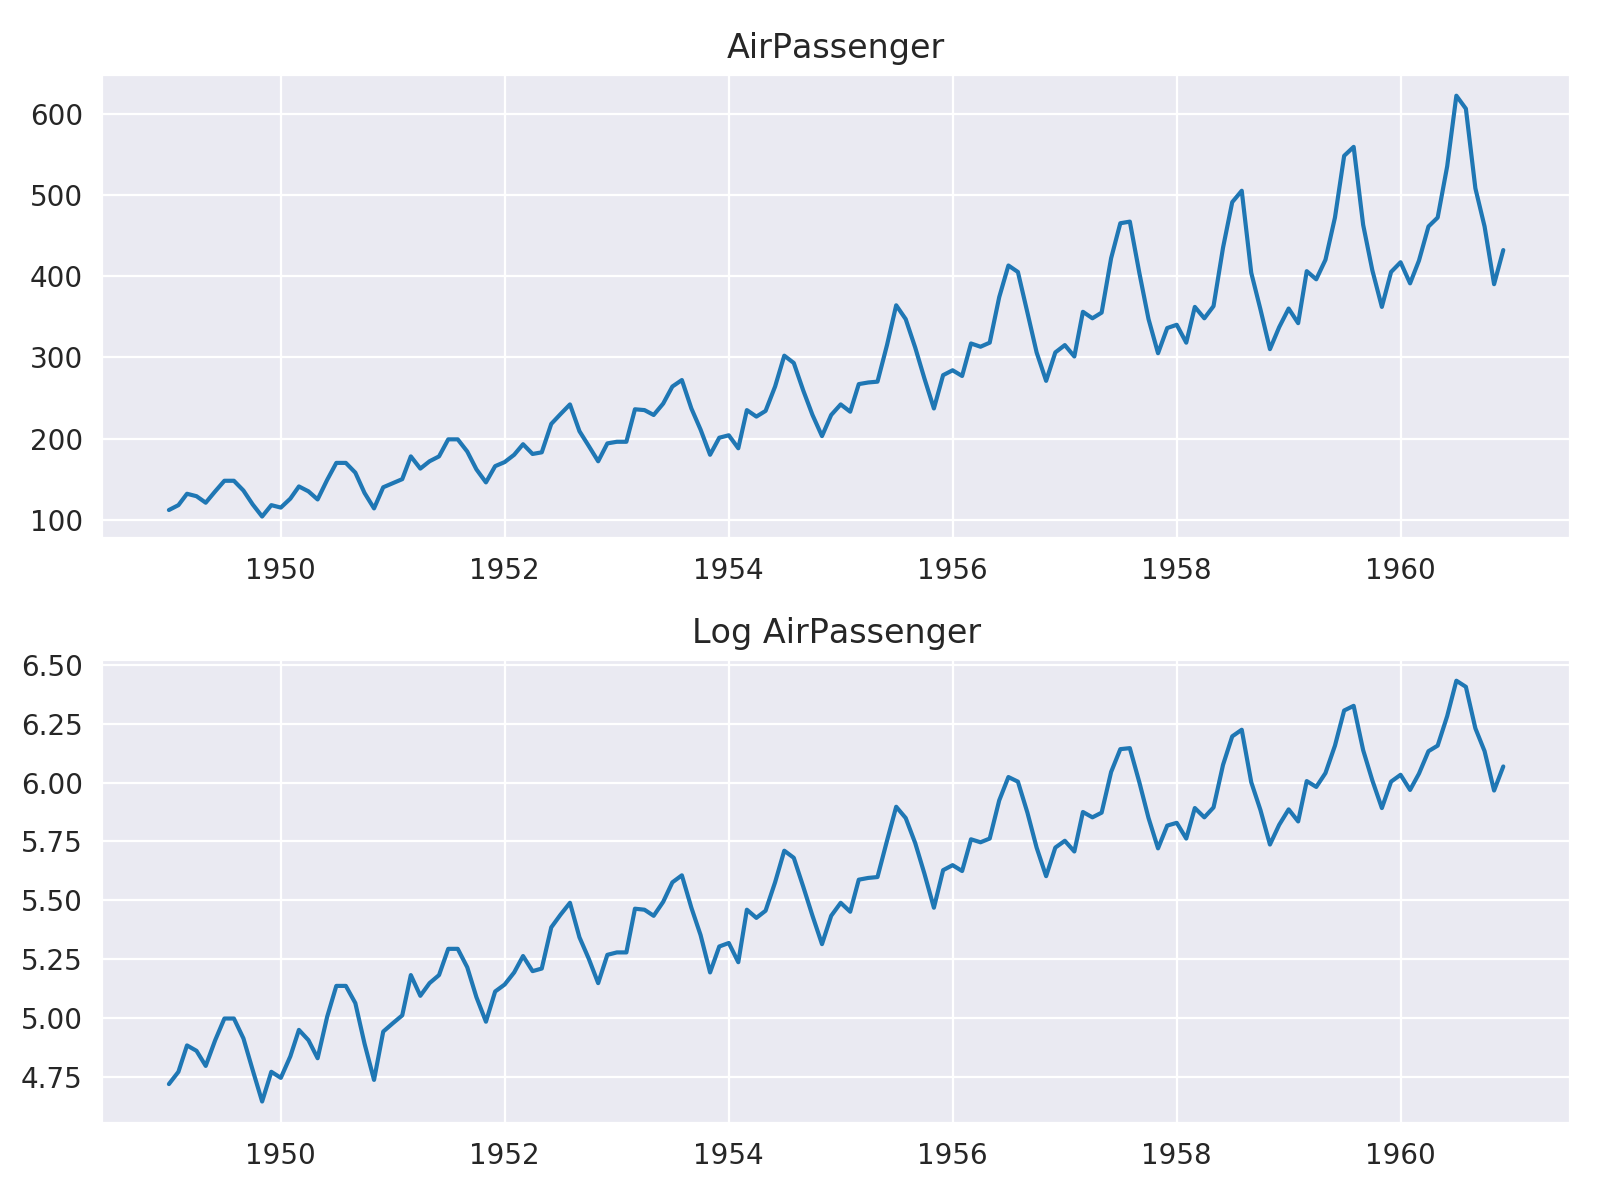

/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


In [22]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

ax1.plot(date, y)
ax1.set_title('AirPassenger')

ax2.plot(date, np.log(y))
ax2.set_title('Log AirPassenger')

plt.tight_layout()
plt.show()

Due to the increasing variance we fit a GP to the log-transformed data.

In [23]:
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel, RBF, ExpSineSquared, RationalQuadratic

In [24]:
X_train = X
y_train= np.log(y)
X_test=np.arange(-12, y.shape[0]+12).reshape((-1,1))

In [25]:
k1 = ConstantKernel() 

In [26]:
k2 = RBF(length_scale=60)*ExpSineSquared(length_scale=1, periodicity=12)

In [27]:
k3 = RBF(length_scale=90)*ExpSineSquared(length_scale=1, periodicity=12)

In [28]:
k4 =  WhiteKernel(noise_level=1)

In [29]:
kernel_gp = k1+k2+k3+k4

4.85**2 + RBF(length_scale=197) * ExpSineSquared(length_scale=71.3, periodicity=25.7) + RBF(length_scale=1.05e+03) * ExpSineSquared(length_scale=1.12, periodicity=12) + WhiteKernel(noise_level=0.00138)


<IPython.core.display.Javascript object>


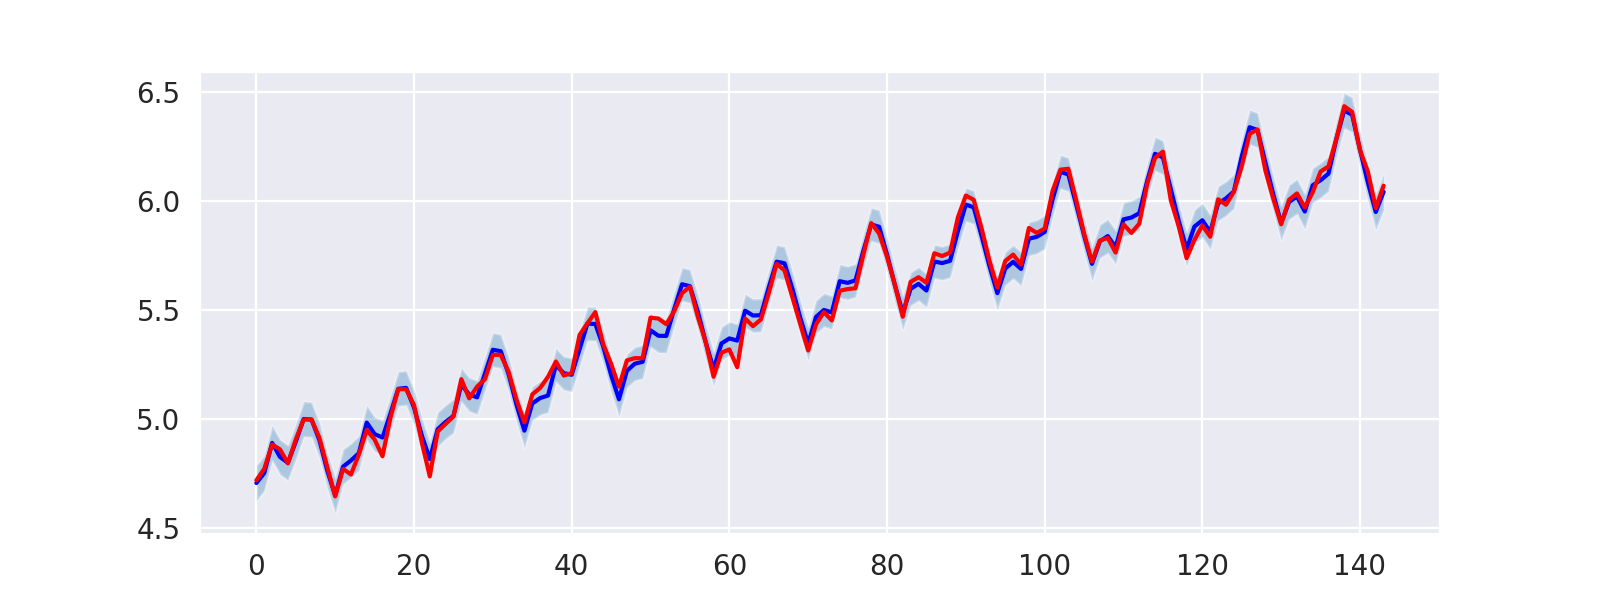

In [30]:
GPR = gaussian_process.GaussianProcessRegressor(kernel=kernel_gp)
GPR.fit(X_train, y_train)
print(GPR.kernel_)
#X_test = np.arange(y.shape[0], y.shape[0]+24).reshape(-1,1)
y_pred, sigma = GPR.predict(X_train, return_std=True)
error = (1.96 * sigma).reshape(-1,1)

# plot
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(X_train.ravel(), y_pred.ravel(), 'b' )
ax.fill_between(X_train.ravel(), y_pred.ravel() - error.ravel(), y_pred.ravel() + error.ravel(), alpha=0.3)
ax.plot(X_train, y_train, 'r-', ms=2)
plt.show()
#